# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
country = []
date = []
new_cities = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append((response['coord']['lon']))
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_cities.append(city)
        print(f"Processing {city} found!.")
    except:
        print(f'{city} result does not exist')
        pass

Processing nikolskoye found!.
palabuhanratu result does not exist
Processing pangnirtung found!.
Processing bluff found!.
Processing clyde river found!.
Processing kapaa found!.
Processing port alfred found!.
Processing borovichi found!.
Processing rikitea found!.
Processing pisco found!.
illoqqortoormiut result does not exist
Processing cherskiy found!.
Processing hilo found!.
warqla result does not exist
Processing salym found!.
Processing santa cruz del sur found!.
Processing ushuaia found!.
Processing dikson found!.
Processing aklavik found!.
Processing ulaanbaatar found!.
saleaula result does not exist
Processing jamestown found!.
tsihombe result does not exist
Processing kavaratti found!.
Processing hammerfest found!.
mys shmidta result does not exist
Processing lebu found!.
Processing fortuna found!.
Processing bolu found!.
Processing san patricio found!.
Processing diffa found!.
Processing leningradskiy found!.
Processing glendive found!.
Processing paita found!.
Processing ixt

Processing orange found!.
Processing cascais found!.
Processing roald found!.
Processing cidreira found!.
Processing pangkalanbuun found!.
Processing souillac found!.
Processing meulaboh found!.
Processing butaritari found!.
Processing domoni found!.
Processing labrea found!.
Processing severodvinsk found!.
Processing stawell found!.
Processing phan thiet found!.
Processing aden found!.
Processing hunterville found!.
Processing cap malheureux found!.
Processing beloha found!.
atka result does not exist
Processing solnechnogorsk found!.
Processing imbituba found!.
Processing sorong found!.
Processing sistranda found!.
Processing mbandaka found!.
Processing juneau found!.
Processing kharan found!.
barentsburg result does not exist
Processing fort nelson found!.
Processing inhambane found!.
sentyabrskiy result does not exist
Processing risod found!.
Processing portland found!.
Processing el alto found!.
Processing asosa found!.
Processing coachella found!.
Processing tiarei found!.
Proces

Processing shelburne found!.
Processing hue found!.
Processing atikokan found!.
Processing camacha found!.
Processing mahibadhoo found!.
tlahualilo result does not exist
Processing luena found!.
Processing eydhafushi found!.
Processing sabang found!.
Processing raudeberg found!.
Processing sao gabriel da cachoeira found!.
Processing bodden town found!.
Processing ayotzintepec found!.
Processing cockburn town found!.
Processing russellville found!.
Processing puro found!.
Processing ust-kuyga found!.
Processing garh maharaja found!.
Processing seguela found!.
Processing urumqi found!.
Processing manokwari found!.
Processing jumla found!.
Processing hlukhiv found!.
Processing sakakah found!.
Processing aginskoye found!.
Processing jinchang found!.
Processing stryn found!.
Processing udachnyy found!.
Processing anagni found!.
Processing sechura found!.
Processing buffalo found!.
bur gabo result does not exist
Processing falun found!.
Processing vidim found!.
Processing podor found!.
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_direct = {
    "City": new_cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": temp,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Cloudiness": cloudiness,
    "Country": country,
    "Data Receiving Time (GMT)": date}
weather_info = pd.DataFrame(weather_direct)
weather_info

,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Country,Data Receiving Time (GMT)
0,nikolskoye,59.70,30.79,44.01,94,8.21,65,RU,1603928398
1,pangnirtung,66.15,-65.71,8.94,79,4.65,30,CA,1603928398
2,bluff,-46.60,168.33,57.00,77,5.99,100,NZ,1603928399
3,clyde river,70.47,-68.59,14.61,89,6.11,96,CA,1603928399
4,kapaa,22.08,-159.32,79.00,71,11.32,34,US,1603928399
...,...,...,...,...,...,...,...,...,...
557,falun,60.60,15.63,45.00,97,8.75,52,SE,1603928465
558,vidim,56.41,103.11,32.58,96,8.25,100,RU,1603928465
559,podor,16.65,-14.96,90.48,13,11.21,11,MR,1603928465
560,gorontalo,0.54,123.06,81.50,77,1.14,89,ID,1603928291


In [5]:
weather_info.describe()

,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Data Receiving Time (GMT)
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,18.716139,19.204342,58.631281,73.722420,7.003861,50.590747,1.603928e+09
std,33.153308,89.981098,21.164980,20.372498,5.181917,40.459744,6.385044e+01
min,-54.800000,-175.200000,-13.700000,10.000000,0.290000,0.000000,1.603928e+09
25%,-8.350000,-62.732500,45.000000,65.000000,3.000000,4.000000,1.603928e+09
50%,20.800000,25.675000,64.590000,79.000000,5.580000,54.000000,1.603928e+09
75%,45.497500,95.930000,75.932500,88.000000,10.115000,94.000000,1.603928e+09
max,78.220000,178.420000,91.980000,100.000000,26.460000,100.000000,1.603928e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_over100 = weather_info.loc[(weather_info['Humidity'] > 100)]
humidity_over100

,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Country,Data Receiving Time (GMT)


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

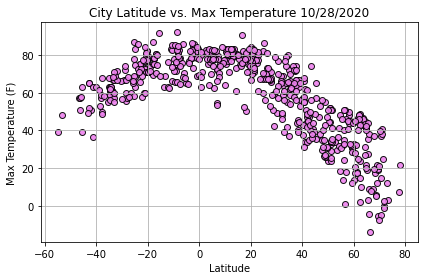

In [9]:
latitude = weather_info['Latitude']
plt.scatter(latitude,weather_info['Max Temperature'],marker="o",facecolors="violet", edgecolors="black",alpha=0.9)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature 10/28/2020')
plt.tight_layout()
plt.grid()
plt.show()
#Generally temperatures rise when approaching the equator as shown here.
#This is shown buy the general curve on this graph.
#Which shows as you get further from 0(Closest point to the equator) the higher the temperature gets

## Latitude vs. Humidity Plot

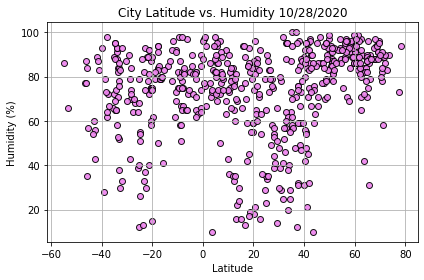

In [10]:
plt.scatter(latitude,weather_info['Humidity'],marker="o",facecolors="violet", edgecolors="black",alpha=0.9)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity 10/28/2020')
plt.tight_layout()
plt.grid()
plt.show()
#There does not appear to be any significant relationships between Latitude and Humidity

## Latitude vs. Cloudiness Plot

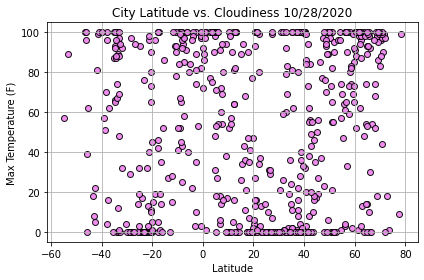

In [11]:
plt.scatter(latitude,weather_info['Cloudiness'],marker="o",facecolors="violet", edgecolors="black",alpha=0.9)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness 10/28/2020')
plt.tight_layout()
plt.grid()
plt.show()
#There also doesn't appear to be much relationship here as well

## Latitude vs. Wind Speed Plot

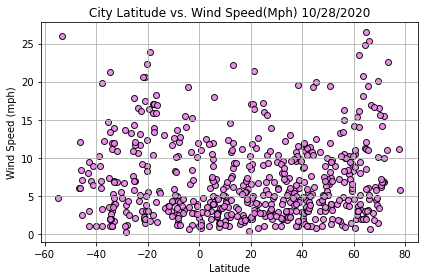

In [12]:
plt.scatter(latitude,weather_info['Wind Speed'],marker="o",facecolors="violet", edgecolors="black",alpha=0.9)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed(Mph) 10/28/2020')
plt.tight_layout()
plt.grid()
plt.show()
#Again, visually there is no relationship
#But it is interesting to see the amount of focus for windspeeds under 15 mph

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

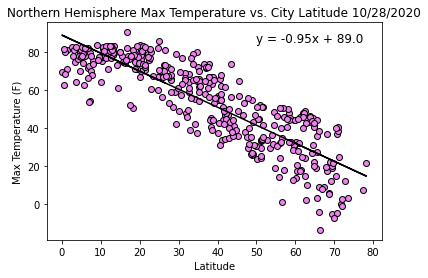

The r-value is -0.8580082788630886


In [13]:
northern_hem = weather_info.loc[(weather_info['Latitude'] > 0)]
northern_lat = northern_hem['Latitude']

plt.scatter(northern_lat,northern_hem['Max Temperature'],marker="o", facecolors="violet", edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere Max Temperature vs. City Latitude 10/28/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Max Temperature'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='black')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(50,85),fontsize=12,color="black")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

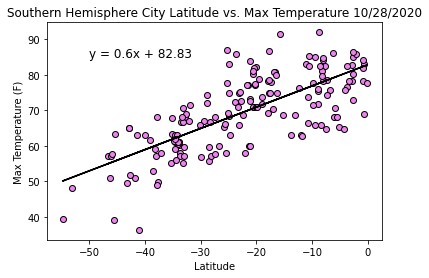

The r-value is 0.7307154635880678


In [14]:
southern_hem = weather_info.loc[(weather_info['Latitude'] < 0)]
southern_lat = southern_hem['Latitude']

plt.scatter(southern_lat,southern_hem['Max Temperature'],marker="o", facecolors="violet", edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature 10/28/2020')

slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Max Temperature'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='black')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(-50,85),fontsize=12,color="black")
plt.show()
print(f'The r-value is {r}')

In [15]:
#Both of the Hemisphere plots show a relatively strong correlation.
#Expectedly they both showing the closer you reach the equator(0) the higher temperature there is

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

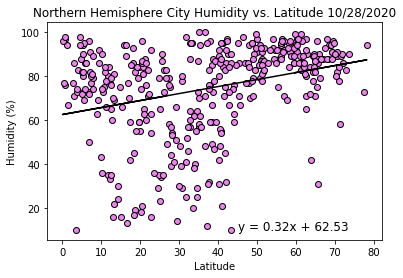

The r-value is 0.30756737651038424


In [16]:
plt.scatter(northern_lat,northern_hem['Humidity'],marker="o", facecolors="violet", edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Humidity vs. Latitude 10/28/2020')

slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Humidity'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='black')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(45,10),fontsize=12,color="black")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

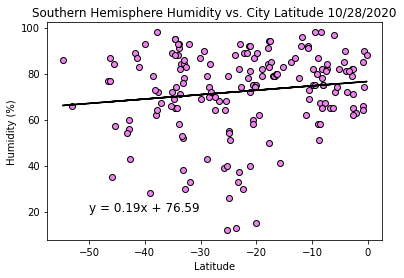

The r-value is 0.13825700435491434


In [17]:
plt.scatter(southern_lat,southern_hem['Humidity'],marker="o", facecolors="violet", edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity vs. City Latitude 10/28/2020')

slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Humidity'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='black')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(-50,20),fontsize=12,color="black")
plt.show()
print(f'The r-value is {r}')

In [18]:
#The is significantly much less of a relationship betwen Humitidy and Latiditude vs. Temp
#This shows there is more at play into what effects Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

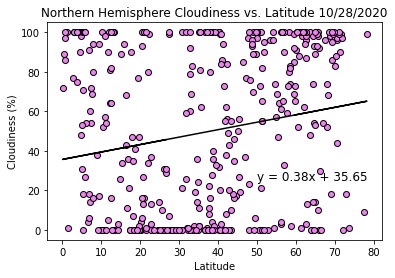

The r-value is 0.19081160803834313


In [19]:
plt.scatter(northern_lat,northern_hem['Cloudiness'],marker="o", facecolors="violet", edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness vs. Latitude 10/28/2020')

slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Cloudiness'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='black')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(50,25),fontsize=12,color="black")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

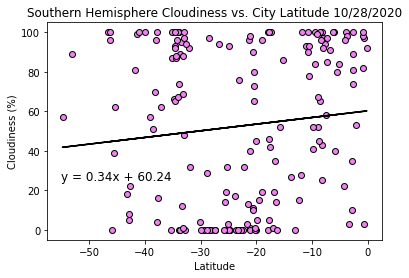

The r-value is 0.10960144461931826


In [20]:
plt.scatter(southern_lat,southern_hem['Cloudiness'],marker="o", facecolors="violet", edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness vs. City Latitude 10/28/2020')

slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Cloudiness'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='black')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(-55,25),fontsize=12,color="black")
plt.show()
print(f'The r-value is {r}')


In [21]:
#Again, there is very little relationship between cloudiness and city latitude.
#This again shows outside factors at play
#Such as maybe water level?

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

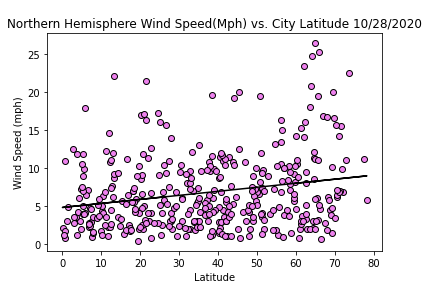

The r-value is 0.22248896266652393


In [22]:
plt.scatter(northern_lat,northern_hem['Wind Speed'],marker="o", facecolors="violet", edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed(Mph) vs. City Latitude 10/28/2020')

slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Wind Speed'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='black')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(30,30),fontsize=12,color="black")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

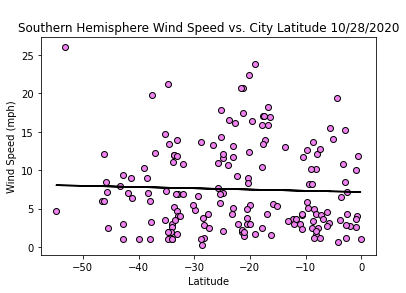

The r-value is -0.03704534540052117


In [23]:
plt.scatter(southern_lat,southern_hem['Wind Speed'],marker="o", facecolors="violet", edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed vs. City Latitude 10/28/2020')

slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Wind Speed'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='black')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(-30,30),fontsize=12,color="black")
plt.show()
print(f'The r-value is {r}')

In [24]:
#Lastly, again there is little to no relationship between windspeed and Latitude. 
#This shows with what we were given.Latitude most greatly effects Temperature over most things.